In [1]:
! kaggle datasets download -d omkargurav/face-mask-dataset

In [2]:
from zipfile import ZipFile

data_ds = './Facial_Images.zip'

with ZipFile(data_ds, 'r') as zip:
    zip.extractall()
    print('The data-set is extracted')

The data-set is extracted


In [102]:
import os
import random
import cv2
import numpy  as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras import models, layers

In [79]:
train_ds_path = './Facial_Images/train/'
test_ds_path = './Facial_Images/validation/'

In [81]:
data_temp = []
emotions = []
x = 0
for expr in os.listdir(train_ds_path):
    print(expr," ", len(os.listdir(train_ds_path + expr)))
    x = x + len(os.listdir(train_ds_path + expr))
    emotions.append(expr)
print(f'Total training images: {x}')


angry   3993
disgust   436
fear   4103
happy   7164
neutral   4982
sad   4938
surprise   3205
Total training images: 28821


In [82]:
emotions

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

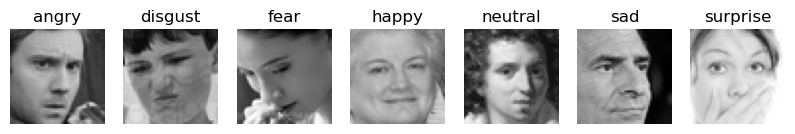

In [88]:
i = 1
plt.figure(figsize=(10, 10))
for expr in os.listdir(train_ds_path):
    img = load_img((train_ds_path + expr) +'/'+ os.listdir(train_ds_path + expr)[0])
    plt.subplot(1, 7, i)
    plt.imshow(img)
    plt.axis('off')
    plt.title(expr)
    i = i+1

In [89]:
train_ds_gen = ImageDataGenerator()
test_ds_gen = ImageDataGenerator()

In [90]:
train_ds = train_ds_gen.flow_from_directory(
    directory=train_ds_path,
    shuffle=True,
    target_size=(48, 48),
    color_mode= 'grayscale',
    class_mode='categorical',
    batch_size=128
)

test_ds = test_ds_gen.flow_from_directory(
    directory=test_ds_path,
    shuffle=False,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=128
)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [94]:
model = models.Sequential()

In [95]:
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(48, 48, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(256))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.25))

model.add(layers.Dense(7, activation='softmax'))

In [96]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization_6 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_7 (Batch (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 128)      

In [99]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [100]:
model.fit(x=train_ds, validation_data=test_ds, epochs=50, batch_size=128)

Epoch 1/50
226/226 [==============================] - 36s 125ms/step - loss: 1.7905 - accuracy: 0.3017 - val_loss: 1.5889 - val_accuracy: 0.3856
Epoch 2/50
226/226 [==============================] - 16s 69ms/step - loss: 1.4408 - accuracy: 0.4430 - val_loss: 1.3238 - val_accuracy: 0.4771
Epoch 3/50
226/226 [==============================] - 16s 69ms/step - loss: 1.2701 - accuracy: 0.5155 - val_loss: 1.3669 - val_accuracy: 0.4724
Epoch 4/50
226/226 [==============================] - 16s 69ms/step - loss: 1.1734 - accuracy: 0.5554 - val_loss: 1.1504 - val_accuracy: 0.5686
Epoch 5/50
226/226 [==============================] - 16s 69ms/step - loss: 1.0988 - accuracy: 0.5845 - val_loss: 1.1118 - val_accuracy: 0.5869
Epoch 6/50
226/226 [==============================] - 16s 69ms/step - loss: 1.0397 - accuracy: 0.6067 - val_loss: 1.0815 - val_accuracy: 0.5962
Epoch 7/50
226/226 [==============================] - 16s 69ms/step - loss: 0.9915 - accuracy: 0.6277 - val_loss: 1.1579 - val_accuracy

In [101]:
model.save('model_01.h5') # savedModel=load_model('model_01.h5')